In [12]:
#4.4.3
import numpy as np
layer_output = np.ones((5,5))
layer_output += np.arange(5)
print(layer_output)

# 50% dropout rate
layer_output *= np.random.randint(0,high=2,size=layer_output.shape)
print(layer_output)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
[[1. 2. 0. 0. 0.]
 [0. 2. 0. 4. 5.]
 [1. 0. 3. 4. 5.]
 [0. 0. 3. 4. 0.]
 [0. 2. 3. 0. 0.]]


In [7]:
#Listing 4.7
from keras.datasets import imdb
from keras import regularizers

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

#Without regularizer
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=0)

results = model.evaluate(x_test, y_test)


#With regularizer
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=0)

results = model2.evaluate(x_test, y_test)

#With regularizer and dropout
model3 = models.Sequential()
model3.add(layers.Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu', input_shape=(10000,)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=0)

results = model3.evaluate(x_test, y_test)


782/782 [==============================] - 1s 1ms/step - loss: 0.6424 - acc: 0.8642


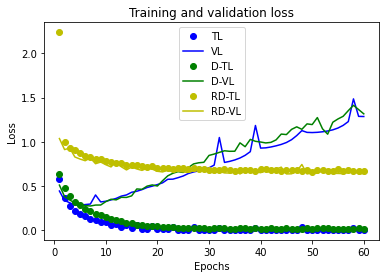

In [8]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs1 = range(1, len(history_dict['acc']) + 1)

history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']

epochs2 = range(1, len(history_dict2['acc']) + 1)

history_dict3 = history3.history
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']
acc_values3 = history_dict3['acc']
val_acc_values3 = history_dict3['val_acc']

epochs3 = range(1, len(history_dict3['acc']) + 1)

#model1
plt.plot(epochs1, loss_values, 'bo', label='TL')
plt.plot(epochs1, val_loss_values, 'b', label='VL')
#plt.plot(epochs1, acc_values, 'ro')#, label='TA')
#plt.plot(epochs1, val_acc_values, 'r')#, label='VA')

#model2
plt.plot(epochs2, loss_values2, 'go', label='D-TL')
plt.plot(epochs2, val_loss_values2, 'g', label='D-VL')
#plt.plot(epochs2, acc_values2, 'yo')#, label='TA')
#plt.plot(epochs2, val_acc_values2, 'y')#, label='VA')

#model3
plt.plot(epochs3, loss_values3, 'yo', label='RD-TL')
plt.plot(epochs3, val_loss_values3, 'y', label='RD-VL')
#plt.plot(epochs2, acc_values2, 'yo')#, label='TA')
#plt.plot(epochs2, val_acc_values2, 'y')#, label='VA')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()